# 1 Perform Operations on Quantum Circuits

## 1.Construct multi-qubit quantum registers

In [1]:
from qiskit import *
%matplotlib inline

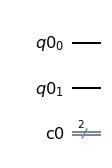

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr,cr)
circuit.draw(output = 'mpl')

建立一個2個qubit的量子寄存器，2個clbit的量子寄存器，並建立一個量子電路
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html#qiskit.circuit.QuantumRegister
https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html#qiskit.circuit.ClassicalRegister
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit

## 2.Use single-qubit gates

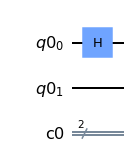

In [3]:
circuit.h(0)
circuit.draw(output = 'mpl')

在qubit[0]上加一個h gate
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.h.html#qiskit.circuit.QuantumCircuit.h

## 3.Use multi-qubit gates

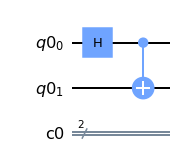

In [4]:
circuit.cx(0,1)
circuit.draw(output = 'mpl')

在qubit[0,1]上再加入一個cx gate
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.cx.html#qiskit.circuit.QuantumCircuit.cx

## 4.Measure quantum circuits in classical registers

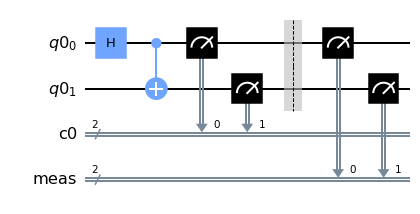

In [5]:
circuit.measure([0,1],[0,1])
circuit.measure_all()
circuit.draw(output = 'mpl')

將qubit[0,1]觀測的結果記錄到clbit[0,1]
用measure_all先加上一個barrier，再觀測所有qubit，並將觀測的結果記錄到meas(古典位元)
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html#qiskit.circuit.QuantumCircuit.measure

## 5.Use barrier operations

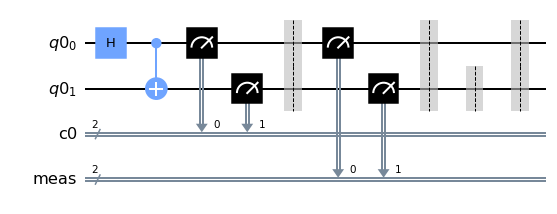

In [6]:
circuit.barrier()
circuit.barrier(1)
circuit.barrier(0,1)
circuit.draw(output = 'mpl')

利用barrier讓qubit上的gate更好理解
barrier() 在每個qubit都加上一個障礙
barrier(0) 在第0個qubit上加上一個障礙
barrier(0,1) 在第0和1個qubit上加上一個障礙
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.barrier.html#qiskit.circuit.QuantumCircuit.barrier

## 6.Extend quantum circuits (Compose)

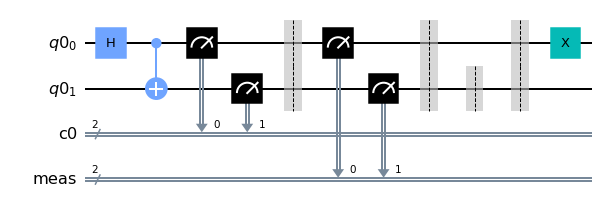

In [7]:
circuit2 = QuantumCircuit(2,2)
circuit2.x(0)
circuit3 = circuit.compose(circuit2)
circuit3.draw(output = 'mpl')

建立兩個量子電路，並利用compose將這兩個量子電路連接起來
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html

## 7.Return the circuit depth

In [8]:
depth = circuit3.depth()
print(depth)

5


回傳量子電路的深度
barrier不算深度
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.depth.html#qiskit.circuit.QuantumCircuit.depth

## 8.Return the OpenQASM string for a circuit

In [9]:
qasmstring = circuit3.qasm()
print(qasmstring)

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
creg meas[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];
barrier q0[0],q0[1];
measure q0[0] -> meas[0];
measure q0[1] -> meas[1];
barrier q0[0],q0[1];
barrier q0[1];
barrier q0[0],q0[1];
x q0[0];



In [10]:
circuit3.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q0[2];\ncreg c0[2];\ncreg meas[2];\nh q0[0];\ncx q0[0],q0[1];\nmeasure q0[0] -> c0[0];\nmeasure q0[1] -> c0[1];\nbarrier q0[0],q0[1];\nmeasure q0[0] -> meas[0];\nmeasure q0[1] -> meas[1];\nbarrier q0[0],q0[1];\nbarrier q0[1];\nbarrier q0[0],q0[1];\nx q0[0];\n'

回傳量子電路的OpenQASM string https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.qasm.html#qiskit.circuit.QuantumCircuit.qasm

# 2 Executing Experiments

## 1.Execute a quantum circuit

In [11]:
from qiskit import *

In [12]:
#創建量子電路並加上一些gate
qc = QuantumCircuit(2,1)
qc.h(0)
qc.measure([0],[0])
qc.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
q_1: ──────╫─
           ║ 
c: 1/══════╩═
           0

### 在模擬器上執行電路:

在模擬器上執行電路，我們需要使用Aer裡面的get_backend函數來選定一個模擬器做為後端
語法為Aer.get_backend('您要指定的後端')

In [13]:
simulator = Aer.get_backend('qasm_simulator') #選定 qasm simulator 作為執行後端

接下來我們要使用execute函數來執行電路，裡面需要輸入三個參數(Circuit, backend, shots = 執行次數) 
其中backend是您上一部指定的後端，shots是執行次數
並使用result函數來提取執行的結果，儲存在新變量中

In [14]:
result = execute(qc, backend = simulator, shots = 1024).result()#執行電路1024次並從後端提取結果

前面執行實驗1024次，我們希望從計數中獲得結果。
我們通過傳入我們的電路作為參數來調用 get_counts() 函數。 我們收到計數後，就可以通過運行以下代碼來打印結果

In [15]:
counts = result.get_counts(qc)#得到結果的次數
print(counts)#打印次數

{'1': 506, '0': 518}


### 在量子電腦上執行電路:

由於我們是在真實的量子電腦進行實驗，所以必須使用您的IBMQ帳號才能執行實驗

In [16]:
from qiskit import IBMQ
provider= IBMQ.load_account()#load你的IBMQ帳號

接下來我們要檢視有哪一些量子電腦可以使用，因此我們使用provider.backends()函數來檢視。這些量子電腦皆可以在IBMQ網站中找到。

In [17]:
provider.backends()#檢視後端設備

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

接下來與前面選定模擬器幾乎相同，使用provider.get_backend()函數來指定你執行電路的後端

In [18]:
qcomp = provider.get_backend('ibmq_quito')#選定 ibmq_quito 作為後端

接著與前面相同，使用execute來執行電路
並使用job_monitor函數來送出您的作業

In [ ]:
from qiskit.tools.monitor import job_monitor
job= execute(qc, backend=qcomp, shots = 1024 )
job_monitor(job)#利用job函數在真實的量子電腦上執行，這會需要一段時間

Job Status: job is queued (47)    

In [ ]:
result_qcomp = job.result()#提取結果

In [ ]:
qcomp_counts = result_qcomp.get_counts(qc)
print(qcomp_counts)

恭喜!現在您已經學會了如何使用simulator以及在真實的量子電腦上執行您的實驗!

# 3 Implement BasicAer: Python-based Simulators

## 1.Use the available simulators

In [ ]:
from qiskit import *
from qiskit import IBMQ
provider= IBMQ.load_account()

我們要找有哪一些量子電腦以及模擬器可以使用，因此我們使用provider.backends()函數來檢視。這些量子電腦以及模擬器皆可以在IBMQ網站中找到。

In [ ]:
provider.backends()

我們隨機選定一個設備，使用job_limit()函數就可以找到他最大執行的次數以及目前使用的狀態
語法分別為maximum_jobs 、 active_jobs

In [ ]:
backend = provider.get_backend('ibmq_lima')
job_limit = backend.job_limit()
maximum_jobs = job_limit.maximum_jobs
active_jobs = job_limit.active_jobs
print(maximum_jobs,active_jobs)

這樣，您就可以知道有那些設備是較少人使用的。這將會大大增加您的工作效率!

另外，您也可以透過code來了解各個量子電腦的電路配置圖

In [ ]:
from qiskit.visualization import plot_error_map,plot_gate_map,plot_circuit_layout
from qiskit import *
from qiskit import IBMQ
provider= IBMQ.load_account()
backend = provider.get_backend('ibmq_lima')
plot_error_map(backend, figsize=(12, 9), show_title=True)

In [ ]:
plot_gate_map(backend, figsize=(12, 9))

也可以指定您的電路要在哪些量子位元上執行

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
%matplotlib inline

IBMQ.load_account()

ghz = QuantumCircuit(3, 3)
ghz.h(0)
for idx in range(1,3):
    ghz.cx(0,idx)
ghz.measure(range(3), range(3))

provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_lima')
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

# 4 Implement Qasm

## 1.Read a QASM file and string

首先 我們要先讀取qasm file 

In [ ]:
from qiskit import *

qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""



接著使用QuantumCircuit.from_qasm_str(qasm_str)這著語法來創建電路
QuantumCircuit.from_qasm_str(qasm_str):Take in a QASM string and generate a QuantumCircuit object.
qasm_str (str) : A QASM program string

如果想要從電腦的檔案中讀取的話，要使用qc = QuantumCircuit.from_qasm_file("/path/to/file.qasm")

In [ ]:
# From str.
qc = QuantumCircuit.from_qasm_str(qasm_str)
# If you want to read from file, use instead
# qc = QuantumCircuit.from_qasm_file("/path/to/file.qasm")



接著重複第二章的動作，來執行這個電路並打印結果

In [ ]:
# You can choose other backend also.
backend = Aer.get_backend("qasm_simulator")

# Execute the circuit and show the result.
job = execute(qc, backend)
result = job.result()
print(result.get_counts())

恭喜 您已經學會如何讀取qasmfile了!

# 5 Compare and Contrast Quantum Information

## 1.Use classical and quantum registers

語法: QuantumRegister(size=None, name=None, bits=None)
     ClassicalRegister(size=None, name=None, bits=None)
     
   size (int) – Optional. The number of bits to include in the register.
   name (str) – Optional. The name of the register. If not provided, a unique name will be auto-generated from the register type. 
   bits (list[Bit]) – Optional. A list of Bit() instances to be used to populate the register.
   *size跟 bit只能選一個寫，同時會有error
   *name的格式有規定，要符合OPENQASM register name
   
 所以我們通常就決定size而已，範例如下所示:

In [ ]:
from qiskit import *

我們要創建一個量子電路，就會用到QuantumRegister、ClassicalRegister的語法

In [ ]:
qr = QuantumRegister(3)
cr = QuantumRegister(3)
qc = QuantumCircuit(qr,cr)# Create a quantum circuit with three qubit and a classcal circuit with three qubit
%matplotlib inline
qc.draw(output = 'mpl')

如果要節省程式碼，我們會將qr = QuantumRegister(3) cr = QuantumRegister(3)省略
直接寫成qc= QuantumCircuit(qubit數,classical bit數)

In [ ]:
qc = QuantumCircuit(3,3)# Create a quantum circuit with three qubit and a classcal circuit with three qubit
%matplotlib inline
qc.draw(output = 'mpl')

可視化結果後，可以發現這兩種程式碼皆可以創建出量子電路

恭喜，您已經學會了如何創建量子電路!

### 任意初始化
如果我們想將一個量子位寄存器初始化為任意狀態怎麼辦？ $n$ 量子位的任意狀態可以由 $2^n$ 振幅的向量指定，其中振幅範數平方之和等於 1。例如，可以準備以下三量子位狀態：

In [ ]:
# Initializing a three-qubit quantum state
from qiskit import *
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize([0,1,0,0], [q[0],q[1]])
qc.draw(output='mpl')

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
qc_state

## 2.Use operators

 operator的意思是運算子。像single gate 如X,H,Y,Z，或是multigate如 CX,CCX,CZ等都是Operator。
 我們也可以自己創造一個運算子來作用在電路上，如下所示:

In [ ]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [ ]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

In [ ]:
XX.data

透過.dim函數，可以知道這個operator的維度

input_dim是輸入的維度
output_dim是經Operator作用後輸出的維度

In [ ]:
input_dim, output_dim = XX.dim
input_dim, output_dim

透過Operator函數，可以知道各個邏輯閘的形式與維度

In [ ]:
from qiskit.extensions import RXGate, XGate, CXGate
Operator(CXGate())

也可以自訂邏輯閘的作用方式
以相位門RXgate為例，可以代換他所改變的相位大小

In [ ]:
# Create an operator from a parameterized Gate object
Operator(RXGate(np.pi / 2))

In [ ]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

利用tensor函數，可以將兩個operator做tensor product(張量積)
語法:Op1.tensor(Op2)，Op1 tensor product Op2

In [ ]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.tensor(B)

利用expand函數，可以將兩個operator做tensor product(張量積)
語法:Op1.expand(Op2)
Op2 tensor product Op1

In [ ]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.expand(B)

利用compose函數，可以將兩個operator相乘(矩陣相乘)
語法:Op1.compose(Op2)， Op2*Op1

或是使用Op1.compose(Op2, front = true)，將會變成Op1*Op2

其意義相當於Op1.dot(Op2)

In [ ]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B)

In [ ]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B, front=True)

我們使用compose 的關鍵字參數qargs 將一個較小的算子與一個較大的算子上的子系統組合在一起，

For example, to compose a two-qubit gate with a three-qubit Operator:

In [ ]:
# Compose XZ with an 3-qubit identity operator
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli(label='XZ'))
op.compose(XZ, qargs=[0, 2])

In [ ]:
# Compose YX in front of the previous operator
op = Operator(np.eye(2 ** 3))
YX = Operator(Pauli(label='YX'))
op.compose(XZ, qargs=[0, 2], front=True)

Operator也可以做線性組合

In [ ]:
XX = Operator(Pauli(label='XX'))
YY = Operator(Pauli(label='YY'))
ZZ = Operator(Pauli(label='ZZ'))

op = 0.5 * (XX + YY - 3 * ZZ)
op

## 3.Measure fidelity

### 在simulator上測量保真度

首先，我們先創建一個5個qubit的量子電路

In [ ]:
from qiskit import *
from qiskit.quantum_info.analysis import hellinger_fidelity

qc = QuantumCircuit(5, 5)
qc.h(2)
qc.cx(2, 1)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cx(1, 0)
qc.measure(range(5), range(5))

接著利用第二章的方法，執行量子電路 並提取兩次結果

In [ ]:
sim = Aer.get_backend('qasm_simulator')
res1 = execute(qc, sim).result()
res2 = execute(qc, sim).result()

最後使用hellinger_fidelity函式，透過比較兩次結果，測量此保真度 
語法為hellinger_fidelity(結果1的計數,結果二的計數)

In [ ]:

hellinger_fidelity(res1.get_counts(), res2.get_counts())

### 在量子電腦上測量保真度

接著我們要在量子電腦上測量保真度。與在simulator測量的方式一樣，首先我們先創建一個量子電路

In [ ]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.quantum_info.analysis import hellinger_fidelity

qc = QuantumCircuit(5, 5)
qc.h(2)
qc.cx(2, 1)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cx(1, 0)
qc.measure(range(5), range(5))



接著利用第三章的方法，使用provider = IBMQ.laod_account() 以及provider.backends()來知道有哪些量子設備是可用的

In [ ]:
from qiskit import IBMQ
provider= IBMQ.load_account()
provider.backends()


In [ ]:
qcomp = provider.get_backend('ibmq_lima')

from qiskit.tools.monitor import job_monitor
job1= execute(qc, backend=qcomp, shots = 1024 )
job_monitor(job1)

job2= execute(qc, backend=qcomp, shots = 1024 )
job_monitor(job2)



等待執行完後，執行下一儲存格就可以知道保真度了

In [ ]:
res1 = job1.result()
res2 = job2.result()

hellinger_fidelity(res1.get_counts(), res2.get_counts())

也可以使用下列code比較兩個operator的保真度

In [ ]:
import numpy as np

from qiskit import *
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import  XGate

In [ ]:
# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())
op_c = op_a.compose(op_b)

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

# 6 Return the Experiment Results

## 1.Return and understand the histogram data of an experiment

In [ ]:
from qiskit import *

In [ ]:
cr = ClassicalRegister(2)

In [ ]:
qr = QuantumRegister(2)

In [ ]:
circuit = QuantumCircuit(qr, cr)

In [ ]:
circuit = QuantumCircuit(2,2)

In [ ]:
circuit.draw()

In [ ]:
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

In [ ]:
simulator = Aer.get_backend('qasm_simulator')

使用狀態向量模擬器做為後端

In [ ]:
result = execute(circuit, backend=simulator).result()

繪製狀態向量模擬器執行的結果,我們使用 Qiskit 導入可視化圖表工具

In [ ]:
from qiskit.visualization import plot_histogram

利用plot_histogram(result.get_counts(circuit)程式做出圖表

In [ ]:
plot_histogram(result.get_counts(circuit))

## 2.Return and understand the statevector of an experiment

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [ ]:
qc = QuantumCircuit(1)

In [ ]:
initial_state = [0,1]   
qc.initialize(initial_state, 0) 
qc.draw()         

In [ ]:
backend = Aer.get_backend('statevector_simulator')

使用 Qiskit狀態向量模擬器查看結果的狀態

In [ ]:
result = execute(qc,backend).result()

使用get_statevector() 來獲取最終狀態向量

In [ ]:
out_state = result.get_statevector()
print(out_state)

## 3.Return and understand the unitary of an experiment

In [ ]:
from qiskit import *

In [ ]:
qr = QuantumRegister(3)

In [ ]:
cr = ClassicalRegister(3)

In [ ]:
qc = QuantumCircuit(qr,cr)

In [ ]:
qc.x(1)

In [ ]:
qc.measure([0,1,2],[0,1,2])

In [ ]:
qc.draw()

In [ ]:
qc = QuantumCircuit(3,3)

In [ ]:
qc.x(1)
qc.cx(1,2)
qc.barrier(1)
qc.barrier(1,2)

In [ ]:
qc.measure_all()
qc.measure([0,1,2],[0,1,2])

In [ ]:
qc.draw()

In [ ]:
qc.depth()

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
qc.depth()

In [ ]:
qc1 = QuantumCircuit(2,2)
qc1.cx(0,1)
qc1.draw()

In [ ]:
qc2 = qc.compose(qc1,[0,1])
qc2.draw()

In [ ]:
qc2.qasm()

In [ ]:
print(qc2.qasm())

In [ ]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts()
print(counts)

In [ ]:
statevector = result.get_statevector()
print(statevector)

In [ ]:
qc.qasm(True,'leo')

In [ ]:
qc3 = QuantumCircuit.from_qasm_file('leo')

In [ ]:
qc3.draw()

In [ ]:
qc=QuantumCircuit(3)
qc.cx(0,1)

In [ ]:
qq= qc.to_gate()
qq1 = qq.control()

In [ ]:
qc1 = QuantumCircuit(5)

In [ ]:
qq.power(5)

In [ ]:
qc1.append(qq,[0,1,2])
qc1.append(qq1,[0,1,2,3])
qc1.append(qq.power(2),[0,1,2])

In [ ]:
qc1.draw()

In [ ]:
from qiskit.visualization import plot_histogram

In [ ]:
from qiskit import IBMQ 
apitoken='0b81b23dea82ff4dc70d84bd29ff0d943bbd221f2ccf01c37148775ce1d71b85bcc56f4c387133646ed16e880d895b90233fa8409ab0602f5d0caab540baf45a' 
try :    
    IBMQ.enable_account(token=apitoken) 
except:
        pass

In [ ]:
IBMQ.providers() 
IBMQ.load_account()

In [ ]:
import qiskit
print(qiskit.__version__)

In [ ]:
qc =QuantumCircuit(2,2)

In [ ]:
qc.x(1)
qc.draw()

In [ ]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')

In [ ]:
result = execute(qc,backend).result()

In [ ]:
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
print(qc_state)

矩陣表示為[0010]

In [ ]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

矩陣可表示為[1000 0100 0010 0001]

# 7 Use Qiskits Tools

## 1.Monitor the status of a job instance 

In [ ]:
from qiskit import IBMQ
provider= IBMQ.load_account()
qcomp = provider.get_backend('ibmq_santiago')
from qiskit.tools.monitor import job_monitor
job_monitor(execute(qc , backend = qcomp , shots = 1024))

複習一下，由 job_monitor 這個函式可以知道現在執行的狀況
其中的參數是正在執行的工作，裡面包含了之前創建的電路、選擇要使用的機器以及次數

In [ ]:
from qiskit.tools.monitor import backend_monitor
backend_monitor(qcomp)

由 backend_monitor 這個函式可以查看實際執行機器的狀況 

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

#### 而這個可以在左上角顯示等待情況、ID等資訊 ####

# 8 Display and Use System Information 

## 1.Perform operations around the Qiskit version

In [ ]:
import qiskit 

print(qiskit.__qiskit_version__)

print(qiskit.__version__)

這可以印出 qiskit 的版本資訊，後者會顯示較簡潔資訊

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

表格化版本資訊

## 2.Use information gained from %qiskit_backend_overview ##

In [ ]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

IBMQ.load_account()

%qiskit_backend_overview

在儲存好IBM帳號後可以直接透過指令來看在線的可使用的機器

# 9 Construct Visualizations

## 1.Draw a circuit

In [ ]:
from qiskit import *
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
circuit_drawer(qc, output='mpl')

(以上為Qiskit，設完量子閘後作測量，繪圖使用circuit_drawer(output='mpl')

In [ ]:
import cirq
circuit = cirq.circuit InsertStrategy

circuit = cirq.circuit()
circuit.append([CZ(q0, q1)])
circuit.append([H(q0, q1)], strategy=InsertStrategy.EARLIST)

使用google cirq 的InsertStrategy，且量子閘是用Append附加上去，最後使用circuit.append([電路], strategy=InsertStrategy.EARLIST)

## 2.Plot a histogram of data

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit)

銜接上面，引入plot_histigram插件，使用plot_histogram(result.get_counts(電路)語法

In [ ]:
samples=s.run(circuit, repetition=1000)
print(samples.histogram(key='result'))

使用print(samples.histogram(key='result'))匯出圖表

## 3.Plot a Bloch multivectors

In [ ]:
from qiskit import *
from qiskit import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

## 4.Plot a Bloch vector

In [ ]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,1,0], title="New Bloch Sphere")

使用plot_bloch_vector([], title="New Bloch Sphere")匯出布洛赫球

## 5.Plot a QSphere

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
%matplotlib inline

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0.1)

state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

使用plot_state_qsphere(state)匯出Qsphere

## 6.Plot a density matrix

In [ ]:
rho_AB = qi.DeensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex',prefix='\\rho-{AB} =')

使用 (電路).draw('latex',prefix='\\電路 =')匯出Density Matrix

In [ ]:
a,b,c = cirq.LineQubit.range(3)
sampler =cirq.Simulator()
circuit = cirq.Circuit(cirq.X(a),cirq.measure(a, key='out'))
print(sampler.sample(circuit, repetiton=4))

先設定行數a,b,c = cirq.LineQubit.range(3)，測量後使用print(sampler.sample(circuit, repetiton=4))匯出Density matrix

## 7.Plot a gate with error rates

In [ ]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.vivualization import plot_error_map
%matplotlib inline

IBMQ.load_account()
provider =IBMQ.get_provider(hub='ibm-q')
backend= provider.get_backend('ibmq_vigo')
plot_error_map(backend)

在實際的量子電腦下,設定完provider以及Backend，最後使用plot_error_map(backend)匯出

# 10 Access Aer Provider

In [ ]:
from qiskit import BasicAer

## 1.Access a statevector_simulator backend

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
print(qc_state)

## 2.Access a qasm_simulator backend

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## 3.Access a unitary_simulator backend

In [ ]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)